In [1]:
from IPython.display import Audio
from os import path
from pydub import AudioSegment
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import libfmp.b
import math
import sys
sys.path.append('/path/to/ffmpeg')
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
song_path = "song_data"

In [3]:
song_dict = {"name": [], "tempo": [], "loudness": []}

In [4]:
files = librosa.util.find_files(song_path, ext=['mp3']) 
files = np.asarray(files)
for file in tqdm(files):
    src = AudioSegment.from_mp3(file)
    name = "wav/" + file.split("/")[len(file.split("/")) - 1].split(".")[0] 
    src.export(name, format="wav")
    y, sr = librosa.load(name)
    tempo = librosa.beat.tempo(y=y, sr=sr, start_bpm = 100)
    loudness = librosa.feature.rms(y=y).mean()
    song_dict["name"].append(name)
    song_dict["tempo"].append(tempo)
    song_dict["loudness"].append(loudness)

100%|███████████████████████████████████████████| 89/89 [17:19<00:00, 11.68s/it]


In [5]:
song_df = pd.DataFrame.from_dict(song_dict)

In [6]:
song_df

,name,tempo,loudness
0,wav/- Mekaku city Actors op,[99.38401442307692],0.305389
1,wav/01 Guilty Crown op 1,[112.34714673913044],0.310536
2,wav/01 HIGHSCHOOL OF THE DEAD,[95.703125],0.295538
3,wav/01 Shuffle,[86.1328125],0.244970
4,wav/01 only my railgun,[95.703125],0.294948
...,...,...,...
84,wav/Yahari op 2,[112.34714673913044],0.147142
85,wav/Yahari op 3,[92.28515625],0.306154
86,wav/Yosuga No Sora,[99.38401442307692],0.240719
87,wav/Your Lie in April op,[107.666015625],0.111587


In [15]:
song_df["name"] = song_df["name"].apply(lambda x: x.split("/")[1])
song_df

,name,tempo,loudness
0,- Mekaku city Actors op,[99.38401442307692],0.305389
1,01 Guilty Crown op 1,[112.34714673913044],0.310536
2,01 HIGHSCHOOL OF THE DEAD,[95.703125],0.295538
3,01 Shuffle,[86.1328125],0.244970
4,01 only my railgun,[95.703125],0.294948
...,...,...,...
84,Yahari op 2,[112.34714673913044],0.147142
85,Yahari op 3,[92.28515625],0.306154
86,Yosuga No Sora,[99.38401442307692],0.240719
87,Your Lie in April op,[107.666015625],0.111587


In [17]:
song_df["tempo"] = song_df["tempo"].apply(lambda x: x[0])
song_df

,name,tempo,loudness
0,- Mekaku city Actors op,99.384014,0.305389
1,01 Guilty Crown op 1,112.347147,0.310536
2,01 HIGHSCHOOL OF THE DEAD,95.703125,0.295538
3,01 Shuffle,86.132812,0.244970
4,01 only my railgun,95.703125,0.294948
...,...,...,...
84,Yahari op 2,112.347147,0.147142
85,Yahari op 3,92.285156,0.306154
86,Yosuga No Sora,99.384014,0.240719
87,Your Lie in April op,107.666016,0.111587


Text(0, 0.5, 'loudness')

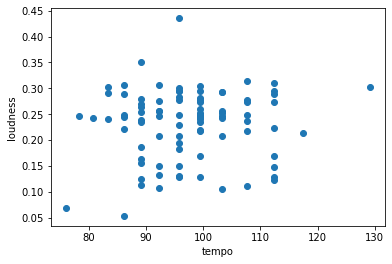

In [19]:
plt.scatter(song_df["tempo"], song_df["loudness"])
plt.xlabel("tempo")
plt.ylabel("loudness")

In [24]:
X = song_df.drop(["name"], axis=1)
Kmean = KMeans(n_clusters=4)
Kmean.fit(X)

KMeans(n_clusters=4)

In [32]:
centroids = Kmean.cluster_centers_
centroids

array([[111.746638  ,   0.23081718],
       [ 94.36565897,   0.23020894],
       [ 86.29776674,   0.22474839],
       [100.70913462,   0.24122443]])

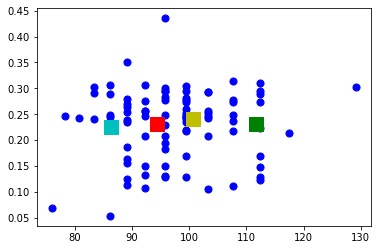

In [35]:
plt.scatter(X["tempo"], X["loudness"], s =50, c="b")
plt.scatter(centroids[0][0], centroids[0][1], s=200, c="g", marker="s")
plt.scatter(centroids[1][0], centroids[1][1], s=200, c="r", marker="s")
plt.scatter(centroids[2][0], centroids[2][1], s=200, c="c", marker="s")
plt.scatter(centroids[3][0], centroids[3][1], s=200, c="y", marker="s")
plt.show()

In [36]:
Kmean.labels_

array([3, 0, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 3, 3, 1,
       2, 1, 2, 1, 2, 3, 0, 2, 3, 2, 1, 0, 1, 3, 1, 3, 3, 2, 1, 0, 3, 0,
       3, 2, 2, 2, 2, 0, 3, 3, 1, 1, 0, 1, 3, 3, 0, 2, 1, 1, 3, 2, 2, 2,
       2, 3, 1, 1, 2, 3, 3, 3, 0, 0, 0, 3, 1, 0, 3, 3, 2, 0, 0, 1, 3, 0,
       1], dtype=int32)

In [37]:
song_df["Cluster Group"] = Kmean.labels_
song_df

,name,tempo,loudness,Cluster Group
0,- Mekaku city Actors op,99.384014,0.305389,3
1,01 Guilty Crown op 1,112.347147,0.310536,0
2,01 HIGHSCHOOL OF THE DEAD,95.703125,0.295538,1
3,01 Shuffle,86.132812,0.244970,2
4,01 only my railgun,95.703125,0.294948,1
...,...,...,...,...
84,Yahari op 2,112.347147,0.147142,0
85,Yahari op 3,92.285156,0.306154,1
86,Yosuga No Sora,99.384014,0.240719,3
87,Your Lie in April op,107.666016,0.111587,0


In [40]:
cluster_0 = song_df.loc[song_df["Cluster Group"] == 0]
print(len(cluster_0))
cluster_0

18


,name,tempo,loudness,Cluster Group
1,01 Guilty Crown op 1,112.347147,0.310536,0
12,Ao no Kanata Rhythm op,112.347147,0.223902,0
13,Asterisk War op 1,107.666016,0.315073,0
14,Bakemonogatari Snake,117.453835,0.212813,0
28,Dorm opening,107.666016,0.216927,0
33,Future Diary op 1,112.347147,0.289750,0
41,HxH op,107.666016,0.277394,0
43,IS op 2,112.347147,0.293973,0
49,Mayo Chiki op,112.347147,0.128505,0
54,Naruto op 10,129.199219,0.301697,0


In [41]:
cluster_1 = song_df.loc[song_df["Cluster Group"] == 1]
print(len(cluster_1))
cluster_1

23


,name,tempo,loudness,Cluster Group
2,01 HIGHSCHOOL OF THE DEAD,95.703125,0.295538,1
4,01 only my railgun,95.703125,0.294948,1
5,ANY op,92.285156,0.106582,1
7,Absolute Duo op,95.703125,0.276569,1
9,Akame Ga Kill op 1,92.285156,0.246980,1
11,Angel Beats op,95.703125,0.182298,1
21,C3 op,92.285156,0.131597,1
23,D Frag op,95.703125,0.300470,1
25,DAL op 2,95.703125,0.206858,1
32,Food Wars op,95.703125,0.282486,1


In [42]:
cluster_2 = song_df.loc[song_df["Cluster Group"] == 2]
print(len(cluster_2))
cluster_2

24


,name,tempo,loudness,Cluster Group
3,01 Shuffle,86.132812,0.244970,2
6,AOT op 1,89.102909,0.239603,2
10,Akame Ga Kill op 2,89.102909,0.113813,2
15,Bakemonogatari main,86.132812,0.247472,2
16,Beatless op,86.132812,0.289109,2
17,Benkyou Dekinai op 1,89.102909,0.253351,2
18,Benkyou Dekinai op 2,80.749512,0.243105,2
22,Crossing Field,89.102909,0.164160,2
24,DAL op 1,89.102909,0.155754,2
26,DAL op 3,83.354335,0.241058,2


In [44]:
cluster_3 = song_df.loc[song_df["Cluster Group"] == 3]
print(len(cluster_3))
cluster_3

24


,name,tempo,loudness,Cluster Group
0,- Mekaku city Actors op,99.384014,0.305389,3
8,Accel World op,99.384014,0.247538,3
19,Bleach op 3,99.384014,0.294392,3
20,Blend S,103.359375,0.245582,3
27,Danganronpa Op,99.384014,0.277578,3
30,Familiar of Zero,103.359375,0.208721,3
35,Gate op,99.384014,0.169347,3
37,Gotoubun Op,103.359375,0.293748,3
38,Haruhi op,99.384014,0.217101,3
42,IS op 1,103.359375,0.243472,3
